In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
df= pd.read_csv(r"C:\Users\user\Downloads\Crop_recommendation.csv")

In [52]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [53]:
df.shape

(2200, 8)

In [54]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [57]:
column = list(df.select_dtypes(include=["int64","float"]).columns)

In [58]:
column

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

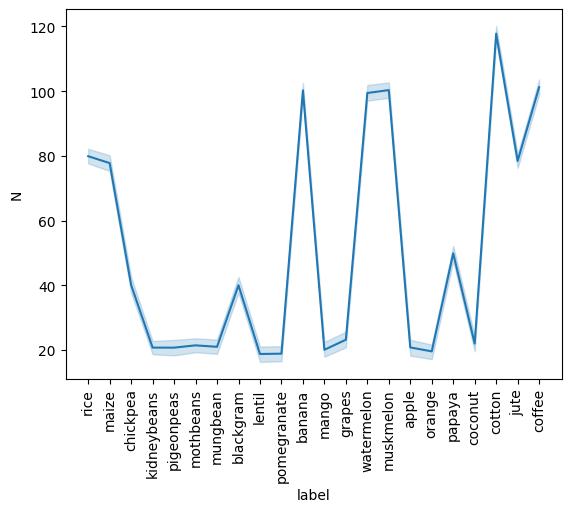

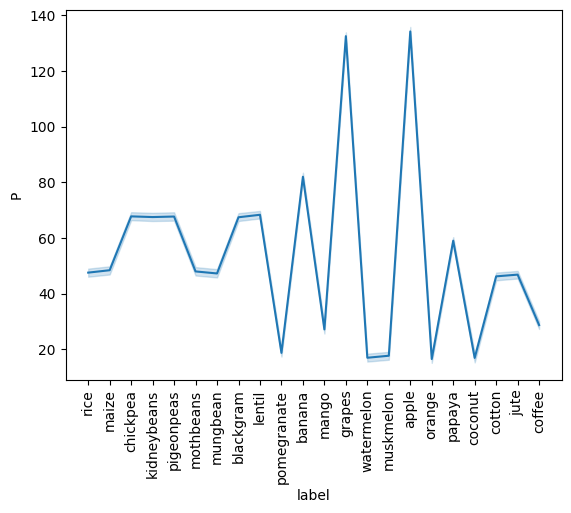

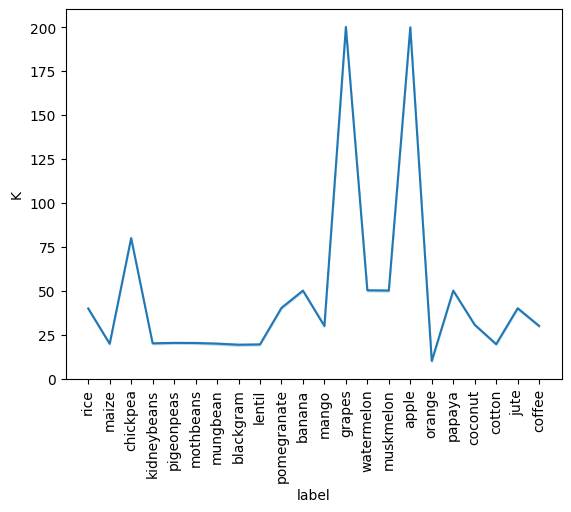

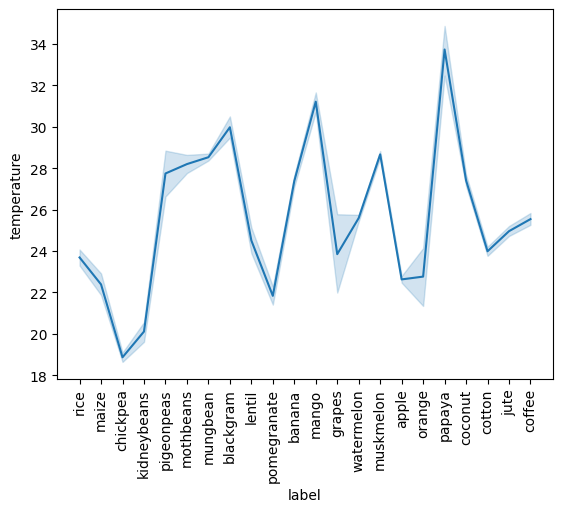

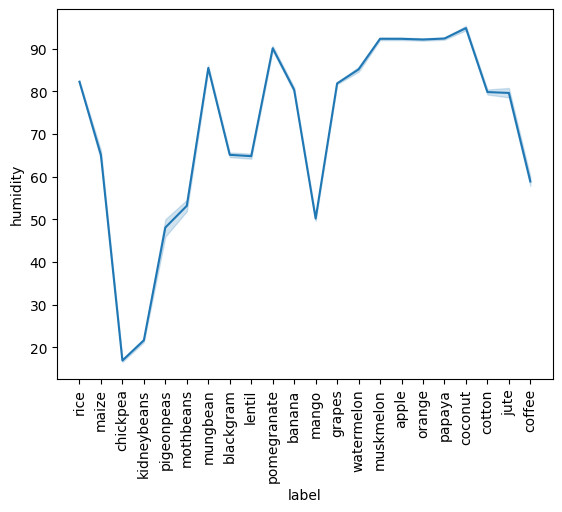

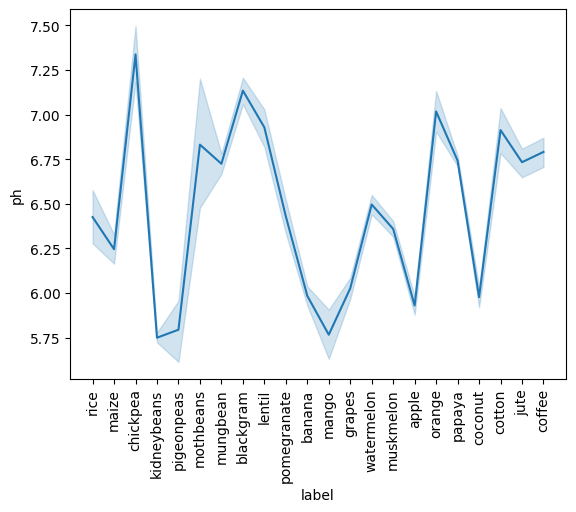

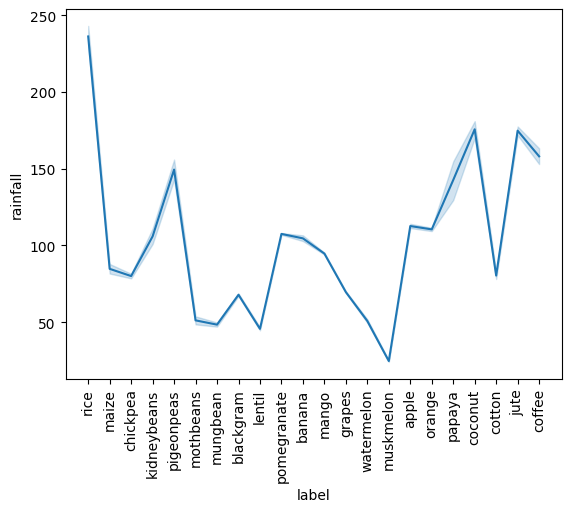

In [59]:
for i in column:
    sns.lineplot(x="label",y=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df["label"] = le.fit_transform(df["label"])

In [62]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


<Axes: xlabel='label', ylabel='N'>

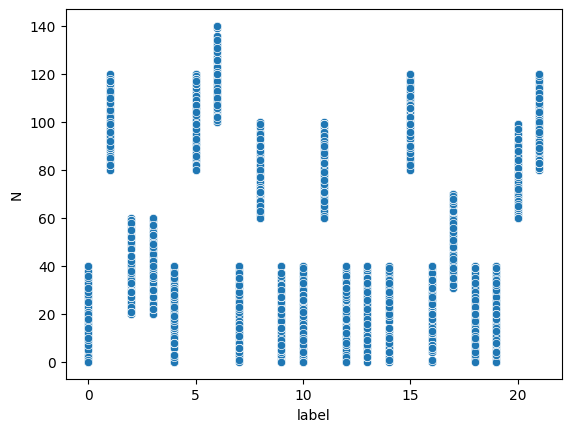

In [63]:
sns.scatterplot(x="label",y="N",data=df)

In [64]:
df["label"].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [65]:
x = df.drop("label",axis=1)

In [66]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [67]:
x.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [68]:
y = df["label"]

In [69]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [74]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]],
      shape=(1760, 7))

In [76]:
X_test

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]], shape=(440, 7))

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(X_train,y_train)

LogisticRegression()

In [80]:
lr.score(X_train,y_train)

0.977840909090909

In [81]:
y_pred = lr.predict(X_test)

In [84]:
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  6,  0,  4,  9, 18, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21, 18, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [85]:
original = le.inverse_transform(y_pred)

In [86]:
original

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',

In [ ]:
result = pd.DataFrame({"actual":y_test,"predicted":y_pred})

In [ ]:
result

,actual,predicted
1451,15,15
1334,21,21
1761,17,17
1735,17,17
1576,0,0
...,...,...
59,20,20
71,20,20
1908,6,6
1958,6,6


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.9636363636363636

In [ ]:
confusion_matrix(y_pred,y_test)

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.90      0.93        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        18
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00        14
           8       0.87      0.83      0.85        24
           9       0.95      0.95      0.95        20
          10       1.00      0.85      0.92        13
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        19
          13       0.92      1.00      0.96        22
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.96    

In [ ]:
xi = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]

In [ ]:
xi

[[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]]

In [ ]:
xi = sc.transform(xi)

In [ ]:
xi

array([[ 1.05434309, -0.34347068, -0.10058754, -0.92360852,  0.47428761,
         0.0349771 ,  1.82528007]])

In [ ]:
lr.predict(xi)[0]

np.int64(20)

In [ ]:
import pickle

In [ ]:
with open("modelsave.pkl","wb") as f:
    pickle.dump(lr,f)

In [88]:
with open("LabelEncoder.pkl","wb") as f:
    pickle.dump(le,f)